In [1]:
from sage.all import *

In [2]:
N=5
chebyshev_pts = [cos(pi * i / (N - 1)) for i in range(N)][::-1]

In [3]:
monomial_integrals = np.zeros((N, N, N, N), dtype=object)

In [18]:
sx, sy = var('sx, sy')

In [ ]:
integral()

In [30]:
for obs_i in range(N):
    for obs_j in range(1, N):
        ox = chebyshev_pts[obs_i]
        oy = chebyshev_pts[obs_j]

        dx = ox - sx
        dy = oy - sy
        r2 = (dx ** 2) + (dy ** 2)

        G = (1 / pi) * log(r2)
        
        forget()
        # It is consistently the case that making the sy > 0 assumption has
        # no effect on whether the integral is applicable for sy < 0
        assume(sy > 0)
        assume(sy < 1)
        #assume(sy > oy)
        assume(2*sy^2+2^(3/2)*sy-1>0)
        for i in range(N):
            for j in range(N):
                integrand = G * sx**i * sy**j
                I_innerA = integral(integrand, sx, -1, ox)
                I_innerB = integral(integrand, sx, ox, 1)
                I_outer = integral(I_innerA + I_innerB, sy, -1, 1)
                print(obs_i, obs_j, i, j, I_outer)
                monomial_integrals[obs_i, obs_j, i, j] = I_outer

0 1 0 0 1/2*(sqrt(2*sqrt(2) + 3)*(sqrt(2) + 1)*arctan(2*(3*sqrt(2) - 4)*sqrt(2*sqrt(2) + 3)) + (sqrt(2) - 1)*sqrt(-2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) + 4)*sqrt(-2*sqrt(2) + 3)) + 2*sqrt(2)*log(2*sqrt(2) + 11) - 2*sqrt(2)*log(-2*sqrt(2) + 11) + 8*arctan(1/4*sqrt(2) + 1/2) - 8*arctan(1/4*sqrt(2) - 1/2) + 4*log(sqrt(2) + 11/2) + 4*log(-sqrt(2) + 11/2) - 24)/pi
0 1 0 1 1/12*((3*sqrt(2) + 2)*sqrt(2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) - 4)*sqrt(2*sqrt(2) + 3)) - (3*sqrt(2) - 2)*sqrt(-2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) + 4)*sqrt(-2*sqrt(2) + 3)) - 24*sqrt(2)*arctan(1/4*sqrt(2) + 1/2) + 24*sqrt(2)*arctan(1/4*sqrt(2) - 1/2) + 16*sqrt(2) + 10*log(2*sqrt(2) + 11) + 12*log(sqrt(2) + 11/2) - 12*log(-sqrt(2) + 11/2) - 10*log(-2*sqrt(2) + 11))/pi
0 1 0 2 1/72*(15*sqrt(2)*sqrt(2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) - 4)*sqrt(2*sqrt(2) + 3)) + 15*sqrt(2)*sqrt(-2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) + 4)*sqrt(-2*sqrt(2) + 3)) + 9*sqrt(2*sqrt(2) + 3)*arctan(2*(3*sqrt(2) - 4)*sqrt(2*sqrt(2) + 3)) - 9*sqrt(-2*sqrt(2)

KeyboardInterrupt: 

In [247]:
basis_functions = []
for i in range(N):
    xi = chebyshev_pts[i]
    prod = 1
    # The definition of the Lagrange interpolating polynomial.
    # In a numerical context, this definition is troublesome
    # and it's better to use the barycentric Lagrange formulas.
    # But this simple definition works fantastically well in 
    # a symbolic setting.
    for j in range(N):
        if j == i:
            continue
        xj = chebyshev_pts[j]
        prod *= (x - xj) / (xi - xj)
    basis_functions.append(prod.full_simplify())

In [248]:
basis_functions

[x^4 - x^3 - 1/2*x^2 + 1/2*x,
 -2*x^4 + sqrt(2)*x^3 + 2*x^2 - sqrt(2)*x,
 2*x^4 - 3*x^2 + 1,
 -2*x^4 - sqrt(2)*x^3 + 2*x^2 + sqrt(2)*x,
 x^4 + x^3 - 1/2*x^2 - 1/2*x]

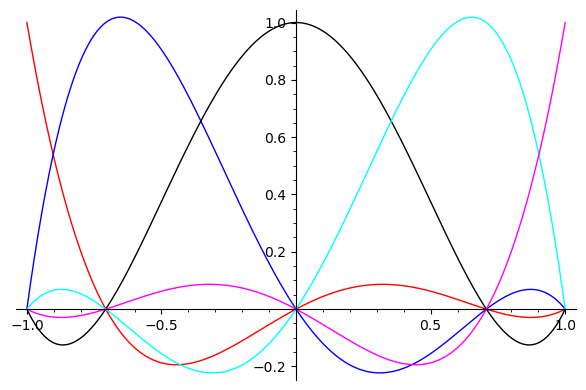

In [249]:
ps = [plot(basis_functions[i], -1, 1, color=['red','blue','black','cyan','magenta'][i]) for i in range(N)]
show(sum(ps))

In [250]:
i = 1
j = 1
basis2d = basis_functions[i].subs(x=sx) * basis_functions[j].subs(x=sy)
basis2d

(2*sx^4 - sqrt(2)*sx^3 - 2*sx^2 + sqrt(2)*sx)*(2*sy^4 - sqrt(2)*sy^3 - 2*sy^2 + sqrt(2)*sy)

In [252]:
sx_coeffs = basis2d.coefficients(sx)
sx_sy_coeffs = [(c[0], e[1], c[1]) for e in sx_coeffs for c in e[0].coefficients(sy)]
sx_sy_coeffs

[(2, 1, 1),
 (-2*sqrt(2), 1, 2),
 (-2, 1, 3),
 (2*sqrt(2), 1, 4),
 (-2*sqrt(2), 2, 1),
 (4, 2, 2),
 (2*sqrt(2), 2, 3),
 (-4, 2, 4),
 (-2, 3, 1),
 (2*sqrt(2), 3, 2),
 (2, 3, 3),
 (-2*sqrt(2), 3, 4),
 (2*sqrt(2), 4, 1),
 (-4, 4, 2),
 (-2*sqrt(2), 4, 3),
 (4, 4, 4)]

In [261]:
S = np.zeros((N, N), dtype=object)
for i in range(N):
    for j in range(N):
        basis2d = basis_functions[i].subs(x=sx) * basis_functions[j].subs(x=sy)
        sx_coeffs = basis2d.coefficients(sx)
        sx_sy_coeffs = [(c[0], e[1], c[1]) for e in sx_coeffs for c in e[0].coefficients(sy)]
        for term in sx_sy_coeffs:
            S[i,j] += (term[0] * monomial_integrals[term[1], term[2]])
            S[i,j] = S[i,j].full_simplify()

In [262]:
S

array([[1/63000*(160*pi + 27960*log(2) - 19737)/pi,
        -1/23625*(30*pi*(85*sqrt(2) - 66) - 30*(205*sqrt(2) - 104)*log(2) - 3800*sqrt(2) + 3721)/pi,
        -1/47250*(7860*pi - 35040*log(2) - 1397)/pi,
        1/23625*(30*pi*(85*sqrt(2) + 66) - 30*(205*sqrt(2) + 104)*log(2) - 3800*sqrt(2) - 3721)/pi,
        -1/189000*(25920*pi - 40080*log(2) - 53939)/pi],
       [-1/23625*(30*pi*(85*sqrt(2) - 66) - 30*(205*sqrt(2) - 104)*log(2) - 3800*sqrt(2) + 3721)/pi,
        2/23625*(120*pi*(20*sqrt(2) + 21) - 120*(110*sqrt(2) + 119)*log(2) + 2600*sqrt(2) + 2051)/pi,
        -4/23625*(30*pi*(65*sqrt(2) - 8) - 30*(95*sqrt(2) + 208)*log(2) - 4450*sqrt(2) + 4633)/pi,
        2/23625*(13320*pi - 10680*log(2) - 33499)/pi,
        -1/23625*(15*pi*(365*sqrt(2) + 418) - 30*(85*sqrt(2) + 96)*log(2) - 15725*sqrt(2) - 17529)/pi],
       [-1/47250*(7860*pi - 35040*log(2) - 1397)/pi,
        -4/23625*(30*pi*(65*sqrt(2) - 8) - 30*(95*sqrt(2) + 208)*log(2) - 4450*sqrt(2) + 4633)/pi,
        -2/23625*(6780*pi